In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("anthonytherrien/dog-vs-cat")

print("Path to dataset files:", path)

100%|██████████| 360M/360M [00:07<00:00, 48.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/anthonytherrien/dog-vs-cat/versions/3


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
# 1. Download the Dataset
dataset_path = kagglehub.dataset_download("anthonytherrien/dog-vs-cat")
print("Dataset downloaded to:", dataset_path)

Dataset downloaded to: /root/.cache/kagglehub/datasets/anthonytherrien/dog-vs-cat/versions/3


In [7]:
# 2. Data Loading and Preprocessing
img_height, img_width = 128, 128
batch_size = 32
data_dir = dataset_path

# Change label_mode to 'int' for sparse labels or 'categorical' for one-hot encoded labels
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='int'  # Use 'int' for sparse labels
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='int'  # Use 'int' for sparse labels
)

Found 1000 files belonging to 1 classes.
Using 800 files for training.
Found 1000 files belonging to 1 classes.
Using 200 files for validation.


In [10]:
# 2. Data Augmentation
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)

In [11]:
# 3. Model Building
num_classes = 1  # Binary classification

model = keras.Sequential(
    [
        data_augmentation,
        layers.Rescaling(1./255),
        layers.Conv2D(32, 3, activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(128, 3, activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='sigmoid')  # Sigmoid for binary
    ]
)

In [12]:
# 4. Model Compilation
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Binary cross-entropy loss
              metrics=['accuracy'])

In [13]:
# 5. Model Training
epochs = 10  # Adjust as needed
model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.9907 - loss: 0.1005 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 1.00

In [14]:
# 6. Model Saving (Optional)
model.save("cat_dog_classifier.keras")

In [20]:
# 7. Prediction (on new images)
def predict_image(image_path, model):
    """Predicts the class of an image (cat or dog).

    Args:
        image_path: Path to the image file.
        model: The trained Keras model.

    Returns:
        A string, either "cat" or "dog", representing the predicted class.
    """
    img_height, img_width = 128, 128  # Match the input size of your model
    img = keras.utils.load_img(image_path, target_size=(img_height, img_width))
    img_array = keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch
    img_array = img_array / 255.0 # Normalize the image

    predictions = model.predict(img_array)

    if predictions[0][0] < 0.5:
        return "cat"
    else:
        return "dog"

# Example usage:
# Load the saved model
loaded_model = keras.models.load_model("cat_dog_classifier.keras")

# Predict the class of an image
image_path = '/content/pexels-larissa-barbosa-945746-1870376.jpg'  # Replace with the actual path
prediction = predict_image(image_path, loaded_model)

print(f"The image is predicted to be a {prediction}.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
The image is predicted to be a cat.


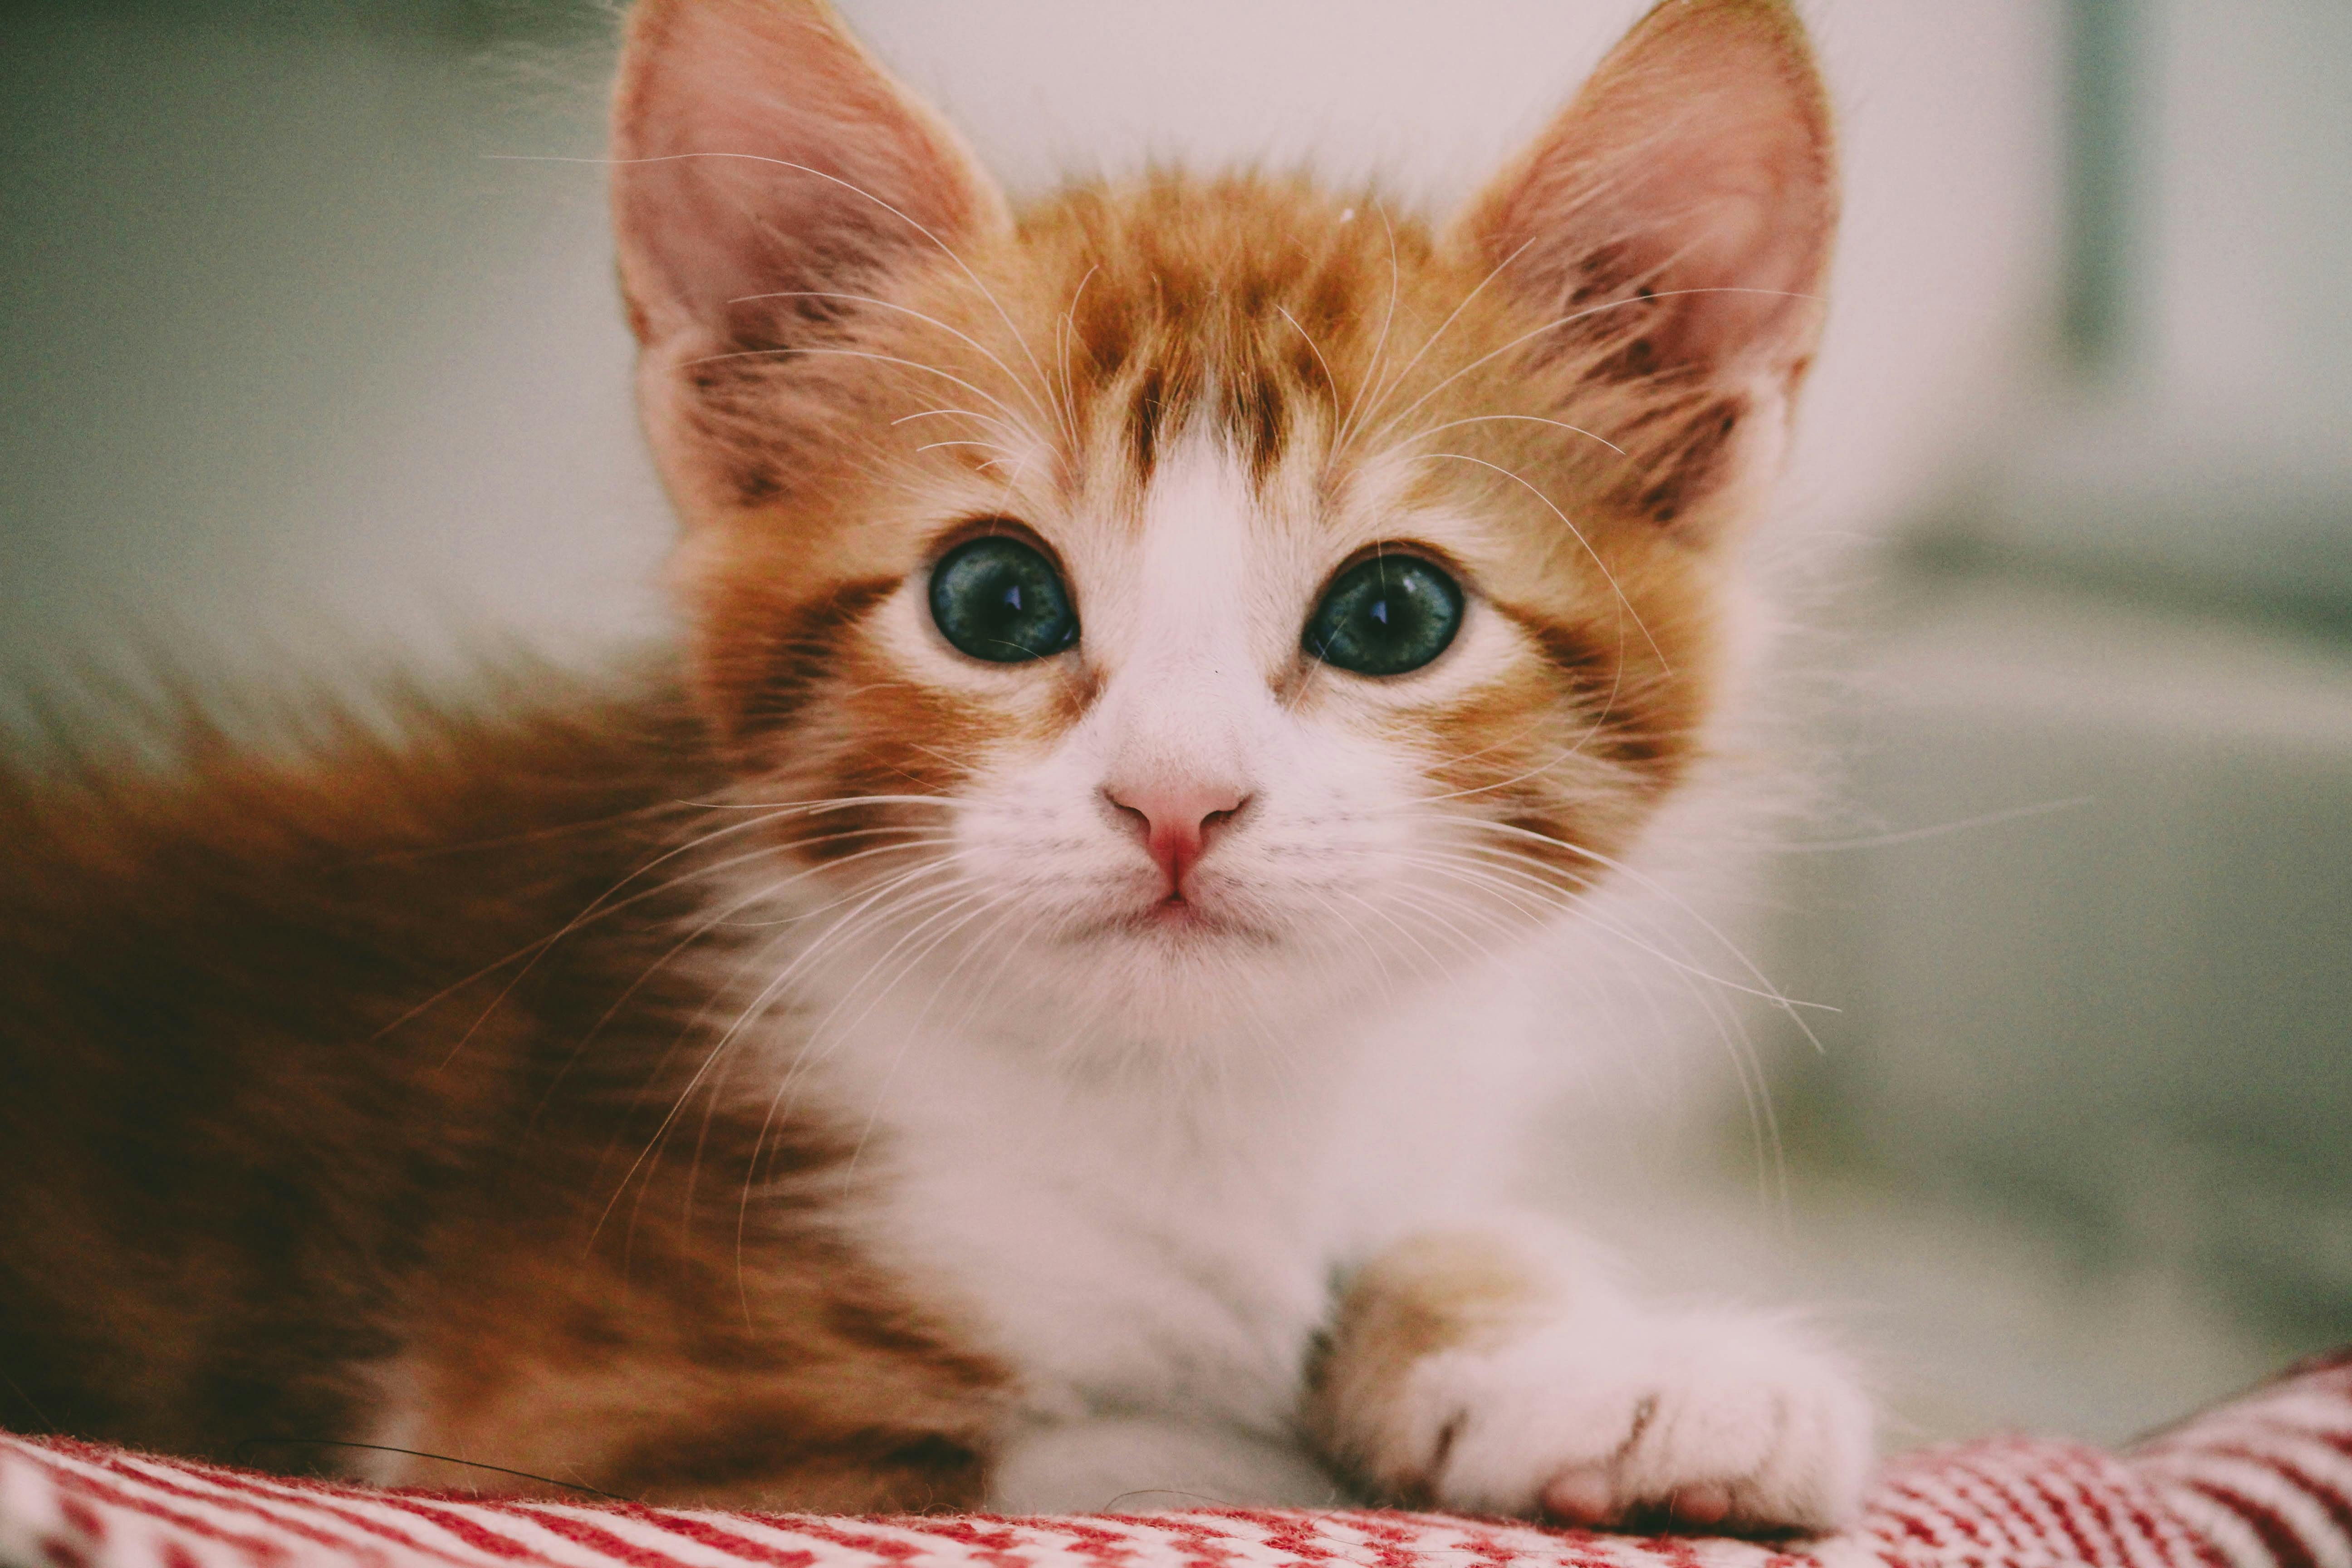

In [25]:
from IPython.display import Image, display  # Import for displaying images

# Assuming 'image_path' is the path to your image
image_path = '/content/pexels-larissa-barbosa-945746-1870376.jpg'

# Display the image with reduced size
display(Image(filename=image_path, width=300, height=200))  # Adjust width and height as needed